# Zadanie

Celem zadania jest implementacja algorytmu Q-learning.

Następnie należy stworzyć agenta rozwiązującego problem [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/). Problem dostępny jest w pakiecie **gym**.


In [2]:
import numpy as np
import gymnasium as gym
from numba import jit, cuda
import matplotlib.pyplot as plt

In [3]:
env = gym.make('Taxi-v3')

In [5]:
class QLearningSolver:
    """Class containing the Q-learning algorithm that might be used for different discrete environments."""

    def __init__(
        self,
        observation_space: int = env.observation_space.n,
        action_space: int = env.action_space.n,
        learning_rate: float = 0.9,
        gamma: float = 0.8,
        epsilon: float = 0.1,
        max_steps: int = 200,
        max_episodes: int = 800
    ):
        self.observation_space = observation_space
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        
        # Initialize steps and limiters
        self.max_steps = max_steps
        self.max_episodes = max_episodes
        self.is_truncated = False
        self.is_terminated = False
        
        # Initialize q_table, reward list
        self.q_table = np.zeros((self.observation_space, self.action_space))
        self.rewards_table = np.zeros(self.max_episodes)
        
        # Initialize environment
        self.state = env.reset()[0]
    
    @jit(target_backend='cuda') 
    def __call__(self) -> None:
        """Performs the algorithm"""
        for episode in range(self.max_episodes):
            self.total_rewards = 0
            self.state = env.reset()[0]
            # print('-----------------------------------------------')
            # print(f'EPISODE: {episode + 1}')
            for step in range(self.max_steps):
                self.update(self.state, self.get_best_action(self.state))

                if self.is_terminated or self.is_truncated:
                    self.rewards_table[episode] = self.total_rewards
                    break
            # print(self.total_rewards)
    
    def update(self, state: np.ndarray, action: np.ndarray) -> None:
        """Update Q-value of given state and action."""
        next_state, reward, self.is_terminated, self.is_truncated, info = env.step(action)
        temp = reward + self.gamma * np.max(self.q_table[next_state]) - self.q_table[state, action]
        self.q_table[state, action] = self.q_table[state,action] + self.learning_rate * temp
        self.total_rewards += reward
        self.state = next_state

    def get_best_action(self, state: np.ndarray) -> np.ndarray:
        """Return action that maximizes Q-value for a given state."""
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_space)
        else:
            return np.argmax(self.q_table[state])
        
    def __repr__(self):
        """Elegant representation of Q-learning solver."""
        return str(f"Q-learning Solver for taxi-v3 problem from gym library.\n Current parameters are:\n learning rate (alpha) = {self.learning_rate},\n discount factor (gamma) = {self.gamma},\n exploration rate (epsilon) = {self.epsilon},\n number of episodes = {self.max_episodes},\n number of steps in each episode = {self.max_steps}")

    def __str__(self):
        return self.__repr__()

/tmp/ipykernel_1207/3114991573.py:33: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(target_backend='cuda')


# Eksperymenty

W każdym z poniższych eksperymentów pokazane wykresy zebrane są z 25 niezależnych uruchomień solvera i przedstawiają łączny wynik wszystkich kroków w funkcji ilości epizodów.

### Eksperyment 1.
Parametry solvera:

In [198]:
solver = QLearningSolver()
print(solver)

Q-learning Solver for taxi-v3 problem from gym library.
 Current parameters are:
 learning rate (alpha) = 0.9,
 discount factor (gamma) = 0.8,
 exploration rate (epsilon) = 0.1,
 number of episodes = 800,
 number of steps in each episode = 200


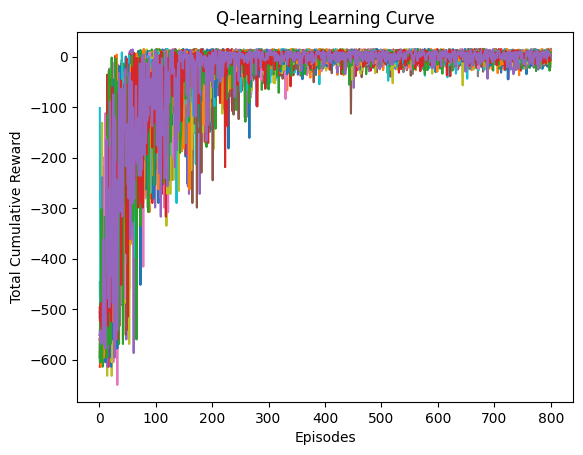

In [202]:
for i in range(25):
    solver = QLearningSolver()
    solver()
    episodes = np.arange(1, solver.max_episodes + 1)
    plt.plot(episodes, solver.rewards_table)
    plt.title('Q-learning Learning Curve')
    plt.xlabel('Episodes')
    plt.ylabel('Total Cumulative Reward')
plt.show()

### Eksperyment 2.
Parametry solvera:

In [201]:
solver = QLearningSolver(learning_rate= 1,
        gamma= 1,
        epsilon= 0.1,
        max_steps= 200)
print(solver)

Q-learning Solver for taxi-v3 problem from gym library.
 Current parameters are:
 learning rate (alpha) = 1,
 discount factor (gamma) = 1,
 exploration rate (epsilon) = 0.1,
 number of episodes = 800,
 number of steps in each episode = 200


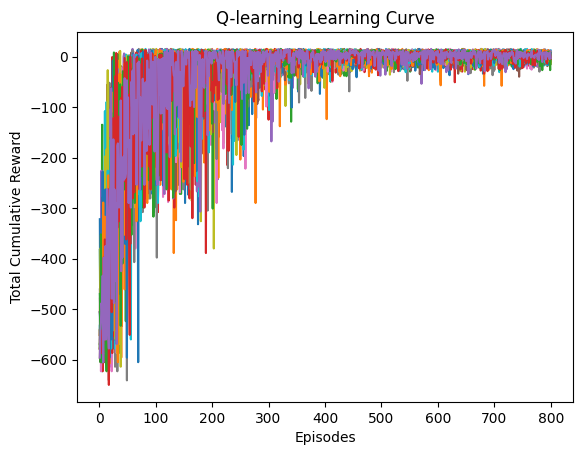

In [196]:
for i in range(25):
    solver = QLearningSolver(learning_rate= 1,
        gamma= 1,
        epsilon= 0.1,
        max_steps= 200)
    solver()
    episodes = np.arange(1, solver.max_episodes + 1)
    plt.plot(episodes, solver.rewards_table)
    plt.title('Q-learning Learning Curve')
    plt.xlabel('Episodes')
    plt.ylabel('Total Cumulative Reward')
plt.show()

### Eksperyment 3.
Parametry solvera:

In [183]:
solver = QLearningSolver(learning_rate= 0.9,
        gamma= 0.8,
        epsilon= 0.5,
        max_steps= 200)
print(solver)

Q-learning Solver for taxi-v3 problem from gym library.
 Current parameters are:
 learning rate (alpha) = 0.9,
 discount factor (gamma) = 0.8,
 exploration rate (epsilon) = 0.5,
 number of episodes = 800,
 number of steps in each episode = 200


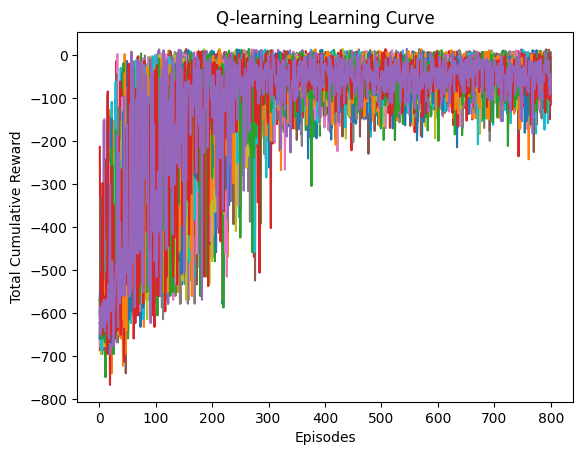

In [185]:
for i in range(25):
    solver = QLearningSolver(learning_rate= 0.9,
        gamma= 0.8,
        epsilon= 0.5,
        max_steps= 200)
    solver()
    episodes = np.arange(1, solver.max_episodes + 1)
    plt.plot(episodes, solver.rewards_table)
    plt.title('Q-learning Learning Curve')
    plt.xlabel('Episodes')
    plt.ylabel('Total Cumulative Reward')
plt.show()

# Eksperyment 4.
Parametry solvera:

In [186]:
solver = QLearningSolver(learning_rate= 0.2,
        gamma= 0.8,
        epsilon= 0.1,
        max_steps= 200)
print(solver)

Q-learning Solver for taxi-v3 problem from gym library.
 Current parameters are:
 learning rate (alpha) = 0.2,
 discount factor (gamma) = 0.8,
 exploration rate (epsilon) = 0.1,
 number of episodes = 800,
 number of steps in each episode = 200


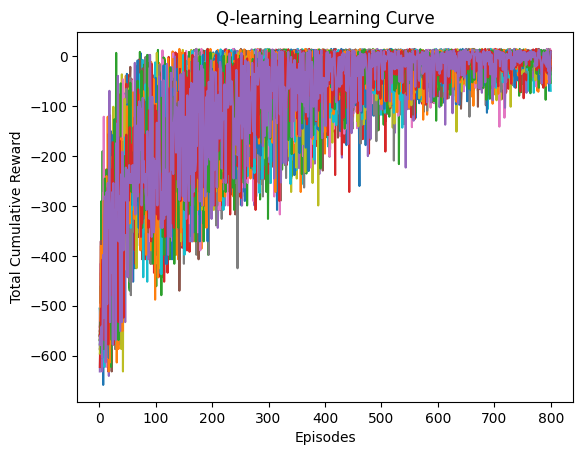

In [187]:
for i in range(25):
    solver = QLearningSolver(learning_rate= 0.2,
        gamma= 0.8,
        epsilon= 0.1,
        max_steps= 200)
    solver()
    episodes = np.arange(1, solver.max_episodes + 1)
    plt.plot(episodes, solver.rewards_table)
    plt.title('Q-learning Learning Curve')
    plt.xlabel('Episodes')
    plt.ylabel('Total Cumulative Reward')
plt.show()

### Eksperyment 5.

In [193]:
solver = QLearningSolver(learning_rate= 0.9,
        gamma= 0.1,
        epsilon= 0.1,
        max_steps= 200)
print(solver)

Q-learning Solver for taxi-v3 problem from gym library.
 Current parameters are:
 learning rate (alpha) = 0.9,
 discount factor (gamma) = 0.1,
 exploration rate (epsilon) = 0.1,
 number of episodes = 800,
 number of steps in each episode = 200


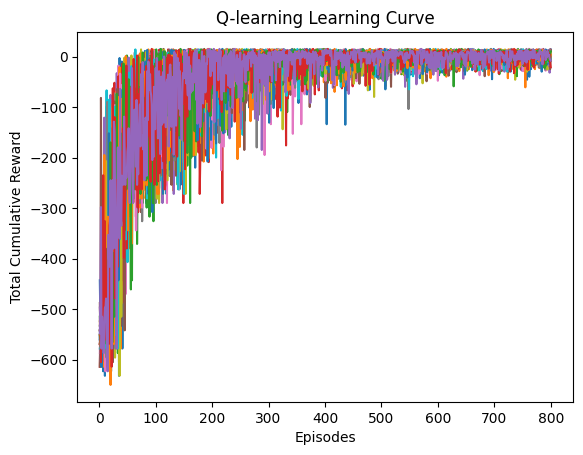

In [194]:
for i in range(25):
    solver = QLearningSolver(learning_rate= 0.9,
        gamma= 0.1,
        epsilon= 0.1,
        max_steps= 200)
    solver()
    episodes = np.arange(1, solver.max_episodes + 1)
    plt.plot(episodes, solver.rewards_table)
    plt.title('Q-learning Learning Curve')
    plt.xlabel('Episodes')
    plt.ylabel('Total Cumulative Reward')
plt.show()

### Eksperyment 6.
Parametry solvera:

In [191]:
solver = QLearningSolver(learning_rate= 0.1,
        gamma= 0.1,
        epsilon= 0.1,
        max_steps= 200)
print(solver)

Q-learning Solver for taxi-v3 problem from gym library.
 Current parameters are:
 learning rate (alpha) = 0.1,
 discount factor (gamma) = 0.1,
 exploration rate (epsilon) = 0.1,
 number of episodes = 800,
 number of steps in each episode = 200


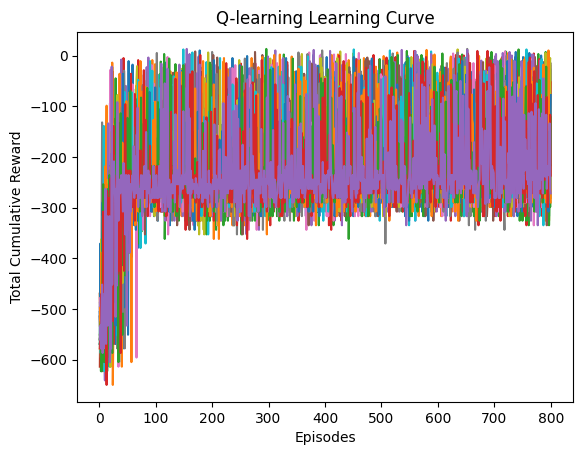

In [190]:
for i in range(25):
    solver = QLearningSolver(learning_rate= 0.1,
        gamma= 0.1,
        epsilon= 0.1,
        max_steps= 200)
    solver()
    episodes = np.arange(1, solver.max_episodes + 1)
    plt.plot(episodes, solver.rewards_table)
    plt.title('Q-learning Learning Curve')
    plt.xlabel('Episodes')
    plt.ylabel('Total Cumulative Reward')
plt.show()

# Wnioski

Algorytm Q-learning pozwala na dość szybkie oraz dokładne znalezienie odpowiedniej strategii poruszania się. W tym przypadku w każdym nowym epizodzie gra zaczynana była z nowego miejsca na mapie z nowym ustawieniem klienta i jego domu, co nie przeszkodzało w poprawnym działaniu. Przy optymalnie dobranych parametrach, wartość całkowitej nagrody zbiegała do wartości dodatniej już po 350 epizodach dla każdego z 25 uruchomień algorytmu. 

Dla tej realizacji najważniejszy okazał się parametr learning rate, którego wartość musiała być dostatecznie duża aby algorytm był w stanie zapamiętać odpowiednią akcję wysadzenia klienta przez agenta, jako że prawdopodobieństwo wystąpienia tego zdarzenia jest małe w warunkach losowych. 

Parametr gamma (współczynnik dyskontowania) miał mały wpływ na działanie algorytmu. Było to spowodowane brakiem innych pozytywnie ocenianych zdarzeń w środowisku, co ograniczało długoterminowe korzyści z dyskontowania przyszłych nagród.

Parametr epsilon (współczynnik eksploracji) musi być odpowiednio mały (epsilon < 0,5), w przeciwnym wypadku algorytm zbyt często wypadałby z optymalnej ścieżki. Optymalnie jest on o małej wartości (0,1), jako że w tej sytuacji jest tylko jeden stan absorbujący, istnieje więc mała szansa, że strategia "utknie" w nieoptymalnym stanie

Poniżej krótki opis każdego z eksperymentów:
- Eksperyment 1. pokazuje działanie algorytmu z optymalnie dobranymi parametrami
- Eksperyment 2. pokazuje działanie algorytmu dla beta = gamma = 1. Algorytm opiera się na znajdowaniu tylko jak najlepszej przyszłej nagrody, nie zważając na inne możliwe ruchy. W tym przypadku odnajduje strategie optymalną.
- Eksperyment 3. pokazuje działanie algorytmu dla parametru eksploracji epsilon = 0,5. Zauważalne jest "rozciągnięcie" wartości w każdym epizodzie spowodowane wypadaniem z optymalnej ścieżki
- Eksperyment 4. pokazuje działanie algorytmu z niskim learning rate (0.2). Dla tego ustawienia algorytm działa bardzo wolno. Po 800 epizodach nie osiąga tak dobrych rezultatów jak algorytm optymalny
- Eksperyment 5. pokazuje działanie algorytmu z niskim gamma wynoszącym 0.1. Jak zostało wspomniane poprzednio ma to mały wpływ na działanie algorytmu. Efekty są zbliżone do optymalnych
- Eksperyment 6. pokazuje działanie algorytmu dla małego learning rate (0.1) oraz gamma (0.1). Dla tego ustawienia algorytm przestaje działać. Zbiega do nieoptymalnej wartości i nie znajduje optymalnej strategii. 